In [1]:
suppressPackageStartupMessages(suppressWarnings(library(lintr))) # linting
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # color palettes

In [2]:
# getting all paths

# confusing matrix paths
confusion_matrix_path <- file.path("../../results/2.modeling/confusion_matrix.csv.gz")
overlapping_confusion_matrix_path <- file.path("../../results/2.modeling/jump_overlap_confusion_matrix.csv.gz")

# f1 score path
f1_score_path <- file.path("../../results/2.modeling/all_f1_scores.csv.gz")

# precision and recall curve path
pr_file_path <- file.path("../../results/2.modeling/precision_recall_scores.csv.gz")

# probability plot
proba_path <- file.path("../../results/3.jump_analysis/JUMP_injury_proba.csv.gz")

# create figures and supplemental dir
dir.create("figures/supplemental", recursive = TRUE)

Warning message in dir.create("figures/supplemental", recursive = TRUE):
“'figures/supplemental' already exists”


In [3]:
# loading all data

# loading confusion matrices
cm_df <- read.csv(confusion_matrix_path, sep = ",")
overlapping_cm_df <- read.csv(overlapping_confusion_matrix_path, sep = ",")

# loading f1 score paths
f1_df <- read.csv(f1_score_path, sep = ",")

# loading pr curve data
pr_df <- read.csv(pr_file_path)

# loading probabilities
proba_df <- read.table(proba_path, head = TRUE, sep=",")

In [4]:
# pre-formatting data before plotting

# update one of the shuffled_model columns to Shuffled and Not Shuffled
cm_df$shuffled_model <- ifelse(cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(cm_df$shuffled_model == "True", "Shuffled", cm_df$shuffled_model))

# update one of the shuffled_model columns to Shuffled and Not Shuffled
overlapping_cm_df$shuffled_model <- ifelse(overlapping_cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(overlapping_cm_df$shuffled_model == "True", "Shuffled", overlapping_cm_df$shuffled_model))

# replacing True and False to shuffled to non shuffled
f1_df$shuffled <- ifelse(f1_df$shuffled == "False", "Not Shuffled",
                                      ifelse(f1_df$shuffled == "True", "Shuffled", f1_df$shuffled))

# update one of the shuffled_model columns to Shuffled and Not Shuffled
pr_df$shuffled <- ifelse(pr_df$shuffled == "False", "Not Shuffled",
                  ifelse(pr_df$shuffled == "True", "Shuffled", pr_df$shuffled))


# replacing True and False to shuffled to non shuffled
proba_df$shuffled_model <- ifelse(proba_df$shuffled_model == "False", "Not Shuffled",
                                      ifelse(proba_df$shuffled_model == "True", "Shuffled", proba_df$shuffled_model))

## Figure 1 Panel A: Confusion Matrix with Train and Test split

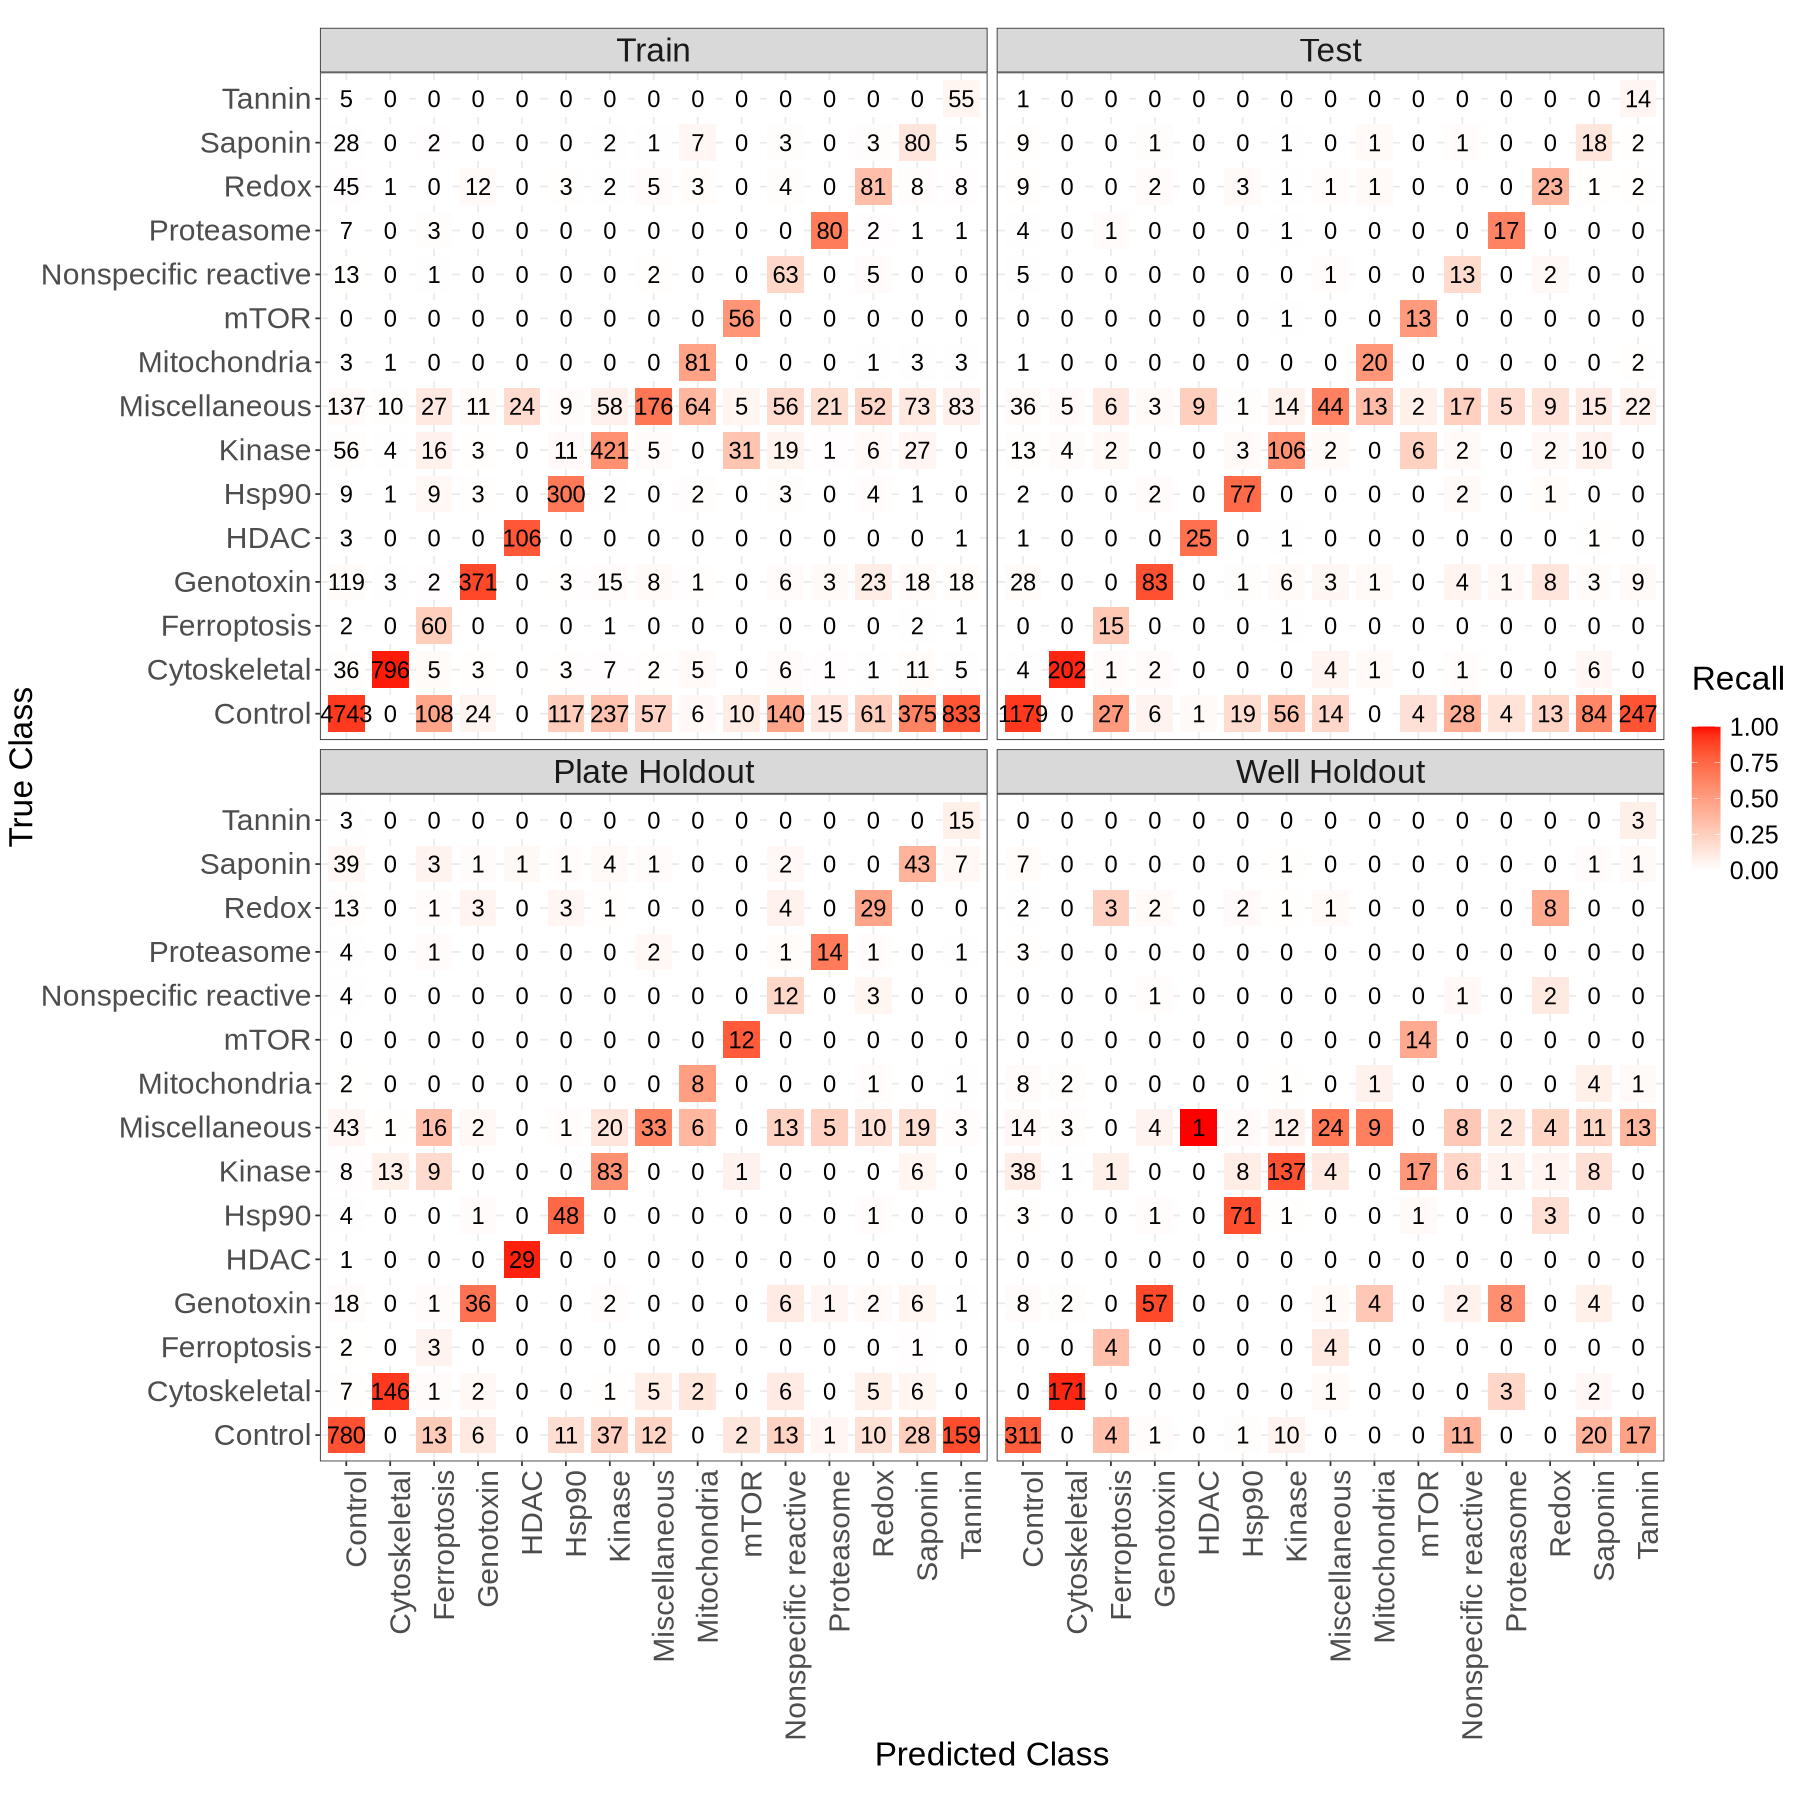

In [5]:
# creating final model confusion matrix with Non-shuffled data
final_model_cm <- cm_df %>%
  filter(shuffled_model == "Not Shuffled" & dataset_type %in% c("Train", "Test", "Plate Holdout", "Well Holdout"))

# Define the desired order of facet levels
# facet_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
facet_order <- c("Train", "Test", "Plate Holdout", "Well Holdout")
final_model_cm$dataset_type <- factor(final_model_cm$dataset_type, levels = facet_order)

width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)

final_model_cm <- (
    ggplot(final_model_cm, aes(x = predicted_labels, y = true_labels))
    + facet_wrap(~dataset_type)
    + geom_point(aes(color = recall), size = 10, shape = 15)
    + geom_text(aes(label = count), size = 5)
    + scale_color_gradient("Recall", low = "white", high = "red", limits = c(0, 1))
    + theme_bw()
    + xlab("Predicted Class")
    + ylab("True Class")
    + theme(
        # legend settings
        legend.title =  element_text(size = 20, margin = margin(b = 20)),
        legend.text = element_text(size = 15),

        strip.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 18),
        axis.text.y = element_text(hjust = 1, size = 18),
        axis.title.x.bottom = element_text(size = 20),
        axis.title.y.left = element_text(size = 20)
        )
    + ggplot2::coord_fixed()
)

# saving file
ggsave(filename = "figures/training_confusion_matrix.png", height = height, width = width, dpi = 600)

final_model_cm

## Supplemental Figure 2: Confusion matrix with Shuffled model 

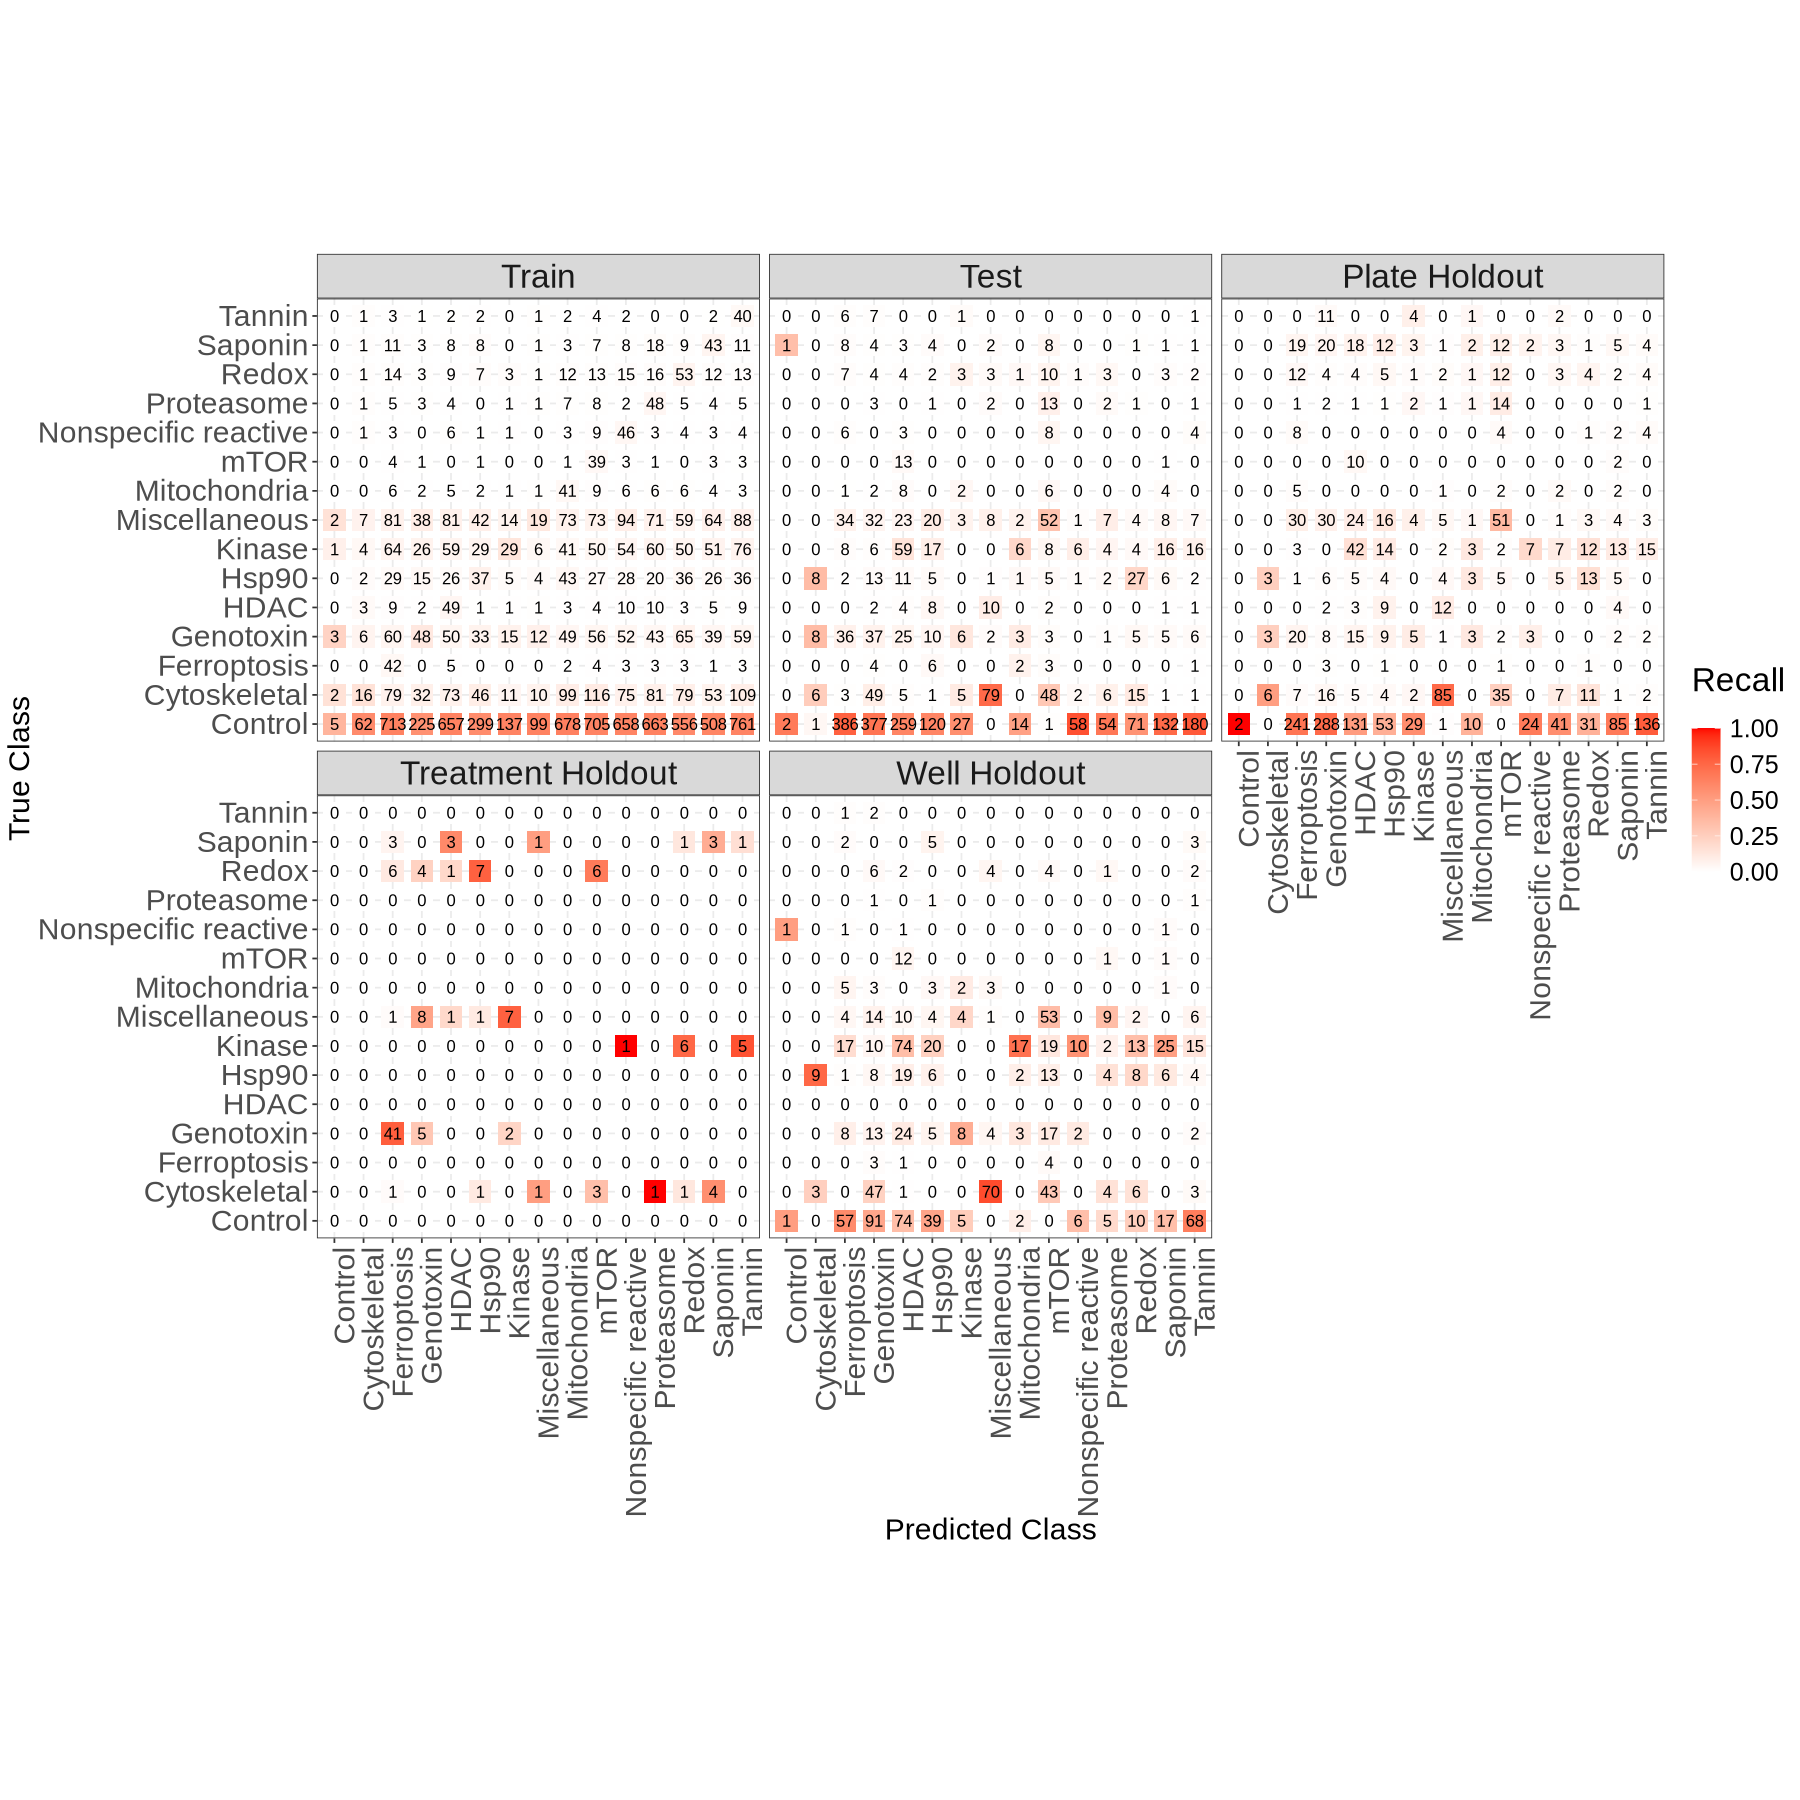

In [6]:
# creating final model confusion matrix with Non-shuffled data
final_model_cm <- cm_df %>%
  filter(shuffled_model == "Shuffled" & dataset_type %in% c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout"))


# Define the desired order of facet levels
facet_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
final_model_cm$dataset_type <- factor(final_model_cm$dataset_type, levels = facet_order)

width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)

supl_model_cm <- (
    ggplot(final_model_cm, aes(y = true_labels, x = predicted_labels))
    + facet_wrap(~dataset_type)
    + geom_point(aes(color = recall), size = 6, shape = 15)
    + geom_text(aes(label = count), size = 3.5)
    + scale_color_gradient("Recall", low = "white", high = "red", limits = c(0, 1))
    + theme_bw()
    + xlab("Predicted Class")
    + ylab("True Class")
      + theme(
        # legend settings
        legend.title =  element_text(size = 20, margin = margin(b = 20)),
        legend.text = element_text(size = 15),
        strip.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 18),
        axis.text.y = element_text(hjust = 1, size = 18),
        axis.title.x.bottom = element_text(size = 18),
        axis.title.y.left = element_text(size = 18)
        )
    + ggplot2::coord_fixed()
)

# saving file
ggsave(filename = "figures/supplemental/sfig2_shuffled_confusion_matrix.png", height = height, width = width, dpi = 600)

supl_model_cm


## Supplmentary figure X: Apply JUMP to Multi-class Logsitic Regression model 

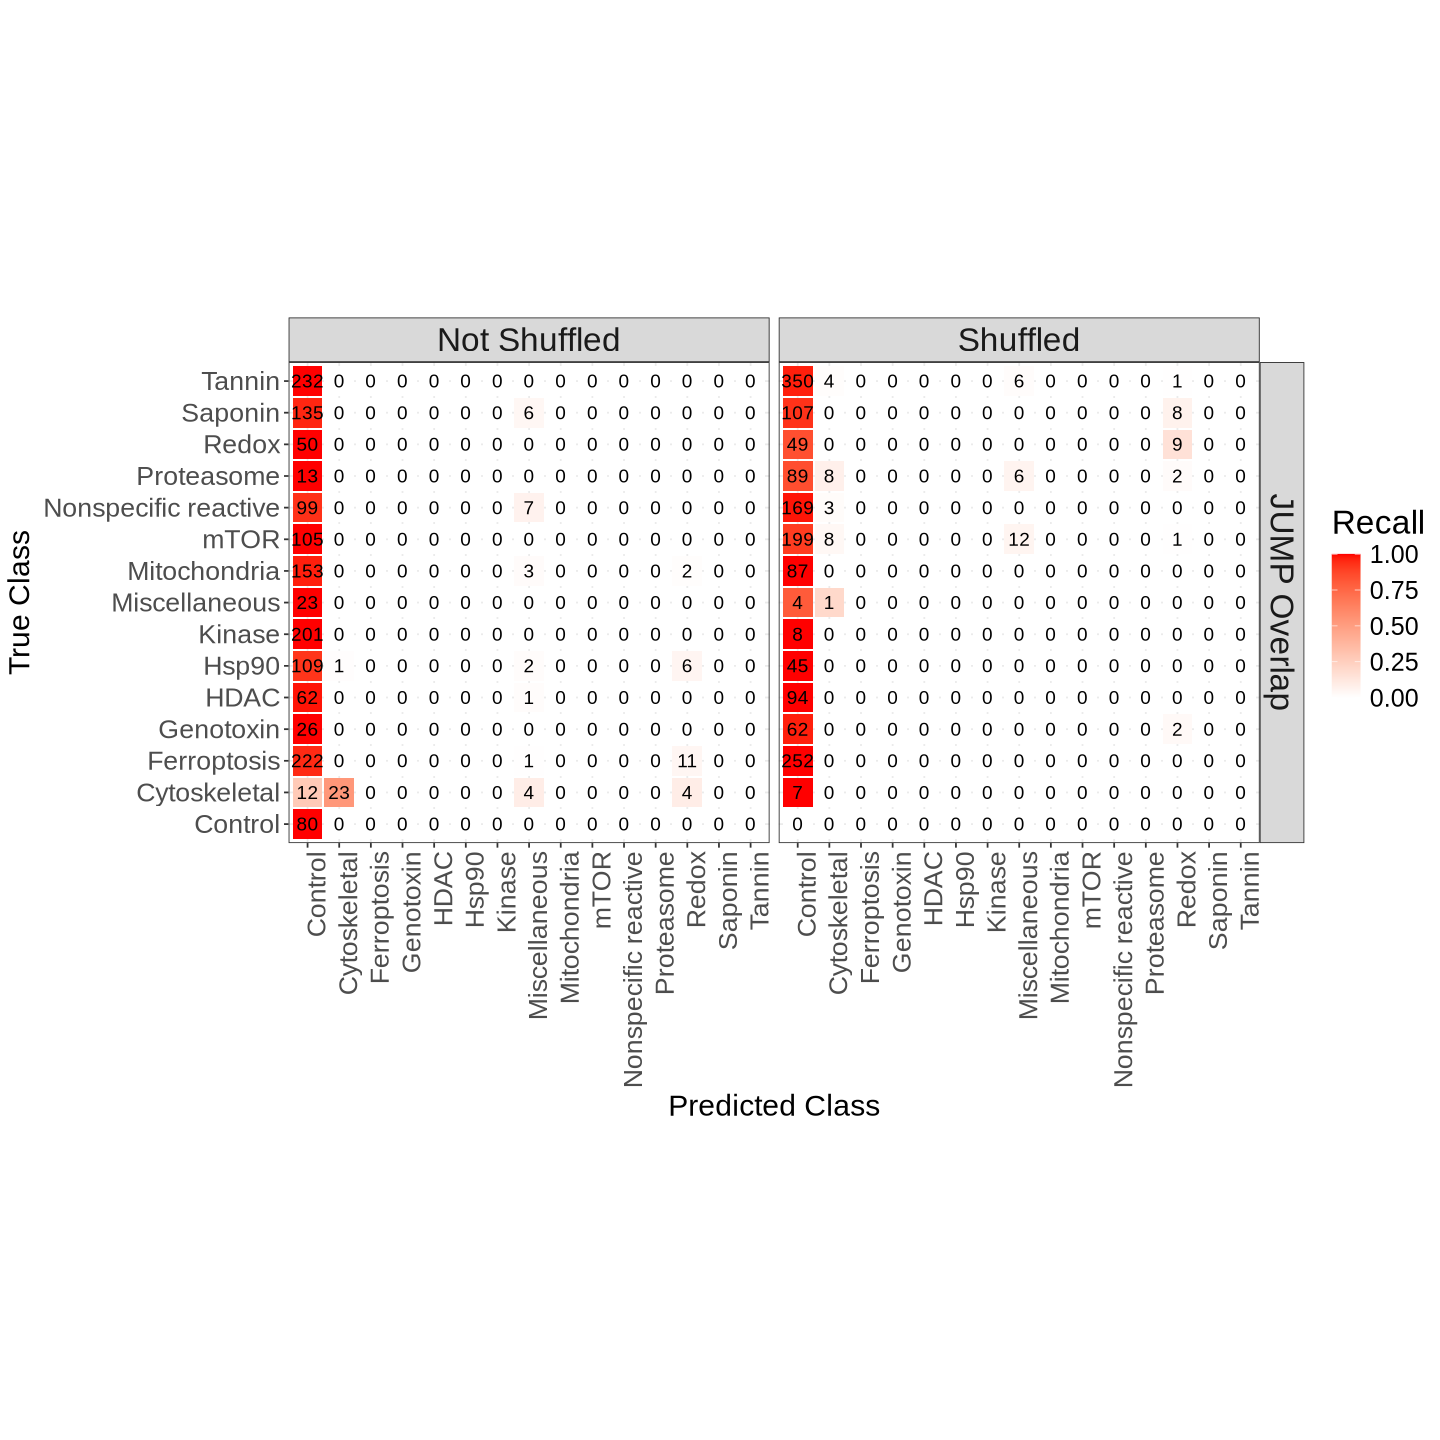

In [7]:
# set image dim
width <- 12
height <- 12
options(repr.plot.width = width, repr.plot.height = height)

# create a confusion matrix plot
overlapping_confusion_matrix_plot <- (
    ggplot(overlapping_cm_df, aes(x = true_labels, y = predicted_labels))
    + facet_grid(dataset_type~shuffled_model)
    + geom_point(aes(color = recall), size = 8, shape = 15)
    + geom_text(aes(label = count), size = 4)
    + scale_color_gradient("Recall", low = "white", high = "red",limits = c(0, 1))
    + theme_bw()
    + ylab("True Class")
    + xlab("Predicted Class")
    + theme(
        legend.title =  element_text(size = 20, margin = margin(b = 10)),
        legend.text = element_text(size = 15),
        strip.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 16),
        axis.text.y = element_text(hjust = 1, size = 16),
        axis.title.x.bottom = element_text(size = 18),
        axis.title.y.left = element_text(size = 18),
        )
    + ggplot2::coord_fixed()
)

# saving file
ggsave(filename = "figures/supplemental/overlapping_confusion_matrix.png", height = height, width = width, dpi=600)

overlapping_confusion_matrix_plot

## Figure 1 Panel B: Creating F1 score plots 

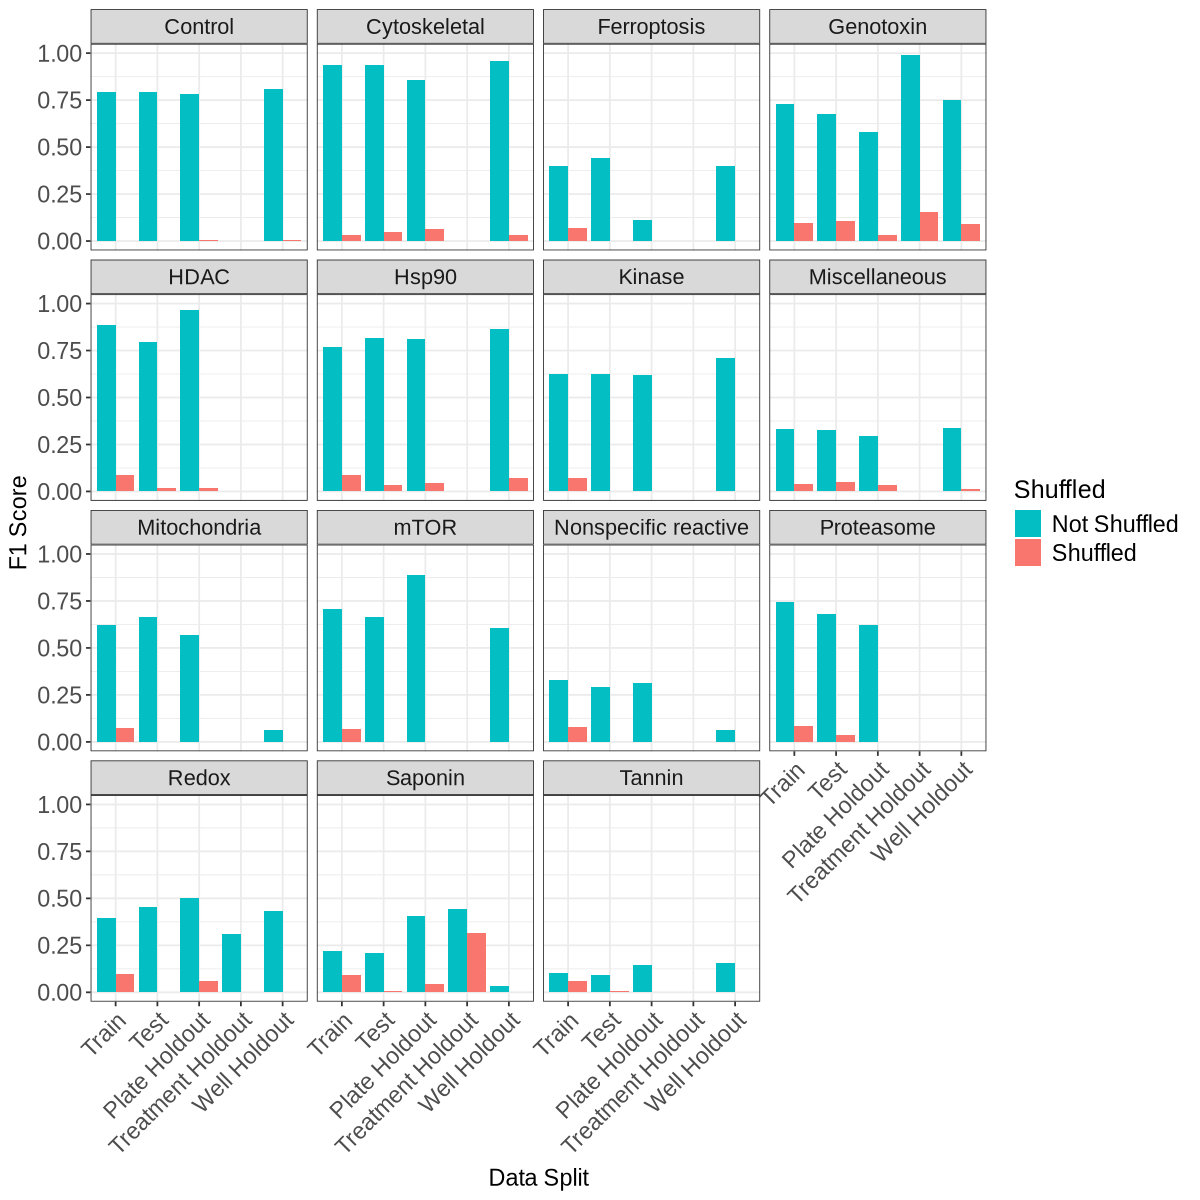

In [8]:
# image size
img_height <- 10
img_width <- 10

options(repr.plot.width = img_width, repr.plot.height = img_height)

# creating a bar plot with a facet grid dictated by whether the model has been shuffled or not
# along the y, facet grid was generated based on the dataset type
legend_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")

f1_bar_plot <- ggplot(f1_df, aes(x = factor(dataset_type, levels = legend_order), y = f1_score, fill = shuffled)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_bw() +
  ylim(0, 1) +
  facet_wrap(~injury_type) +
  labs(y = "F1 Score", x = "Data Split", fill = "Shuffled") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(hjust = 1, size = 14),
        legend.title = element_text(size = 15),
        legend.text = element_text(size = 14),
        strip.text = element_text(size = 13),
        axis.title.y = element_text(size = 14),
        axis.title.x = element_text(size = 14)
        ) +
  scale_fill_manual(values = c(
      "Shuffled" = "#f8766d",
      "Not Shuffled" = "#03bfc4"
    ))

ggsave(filename = "figures/f1_score_barplots.png", height = img_height, width = img_width, dpi = 600)
f1_bar_plot

## Figure 2 Panel A: PR Cruves for Train and Test split

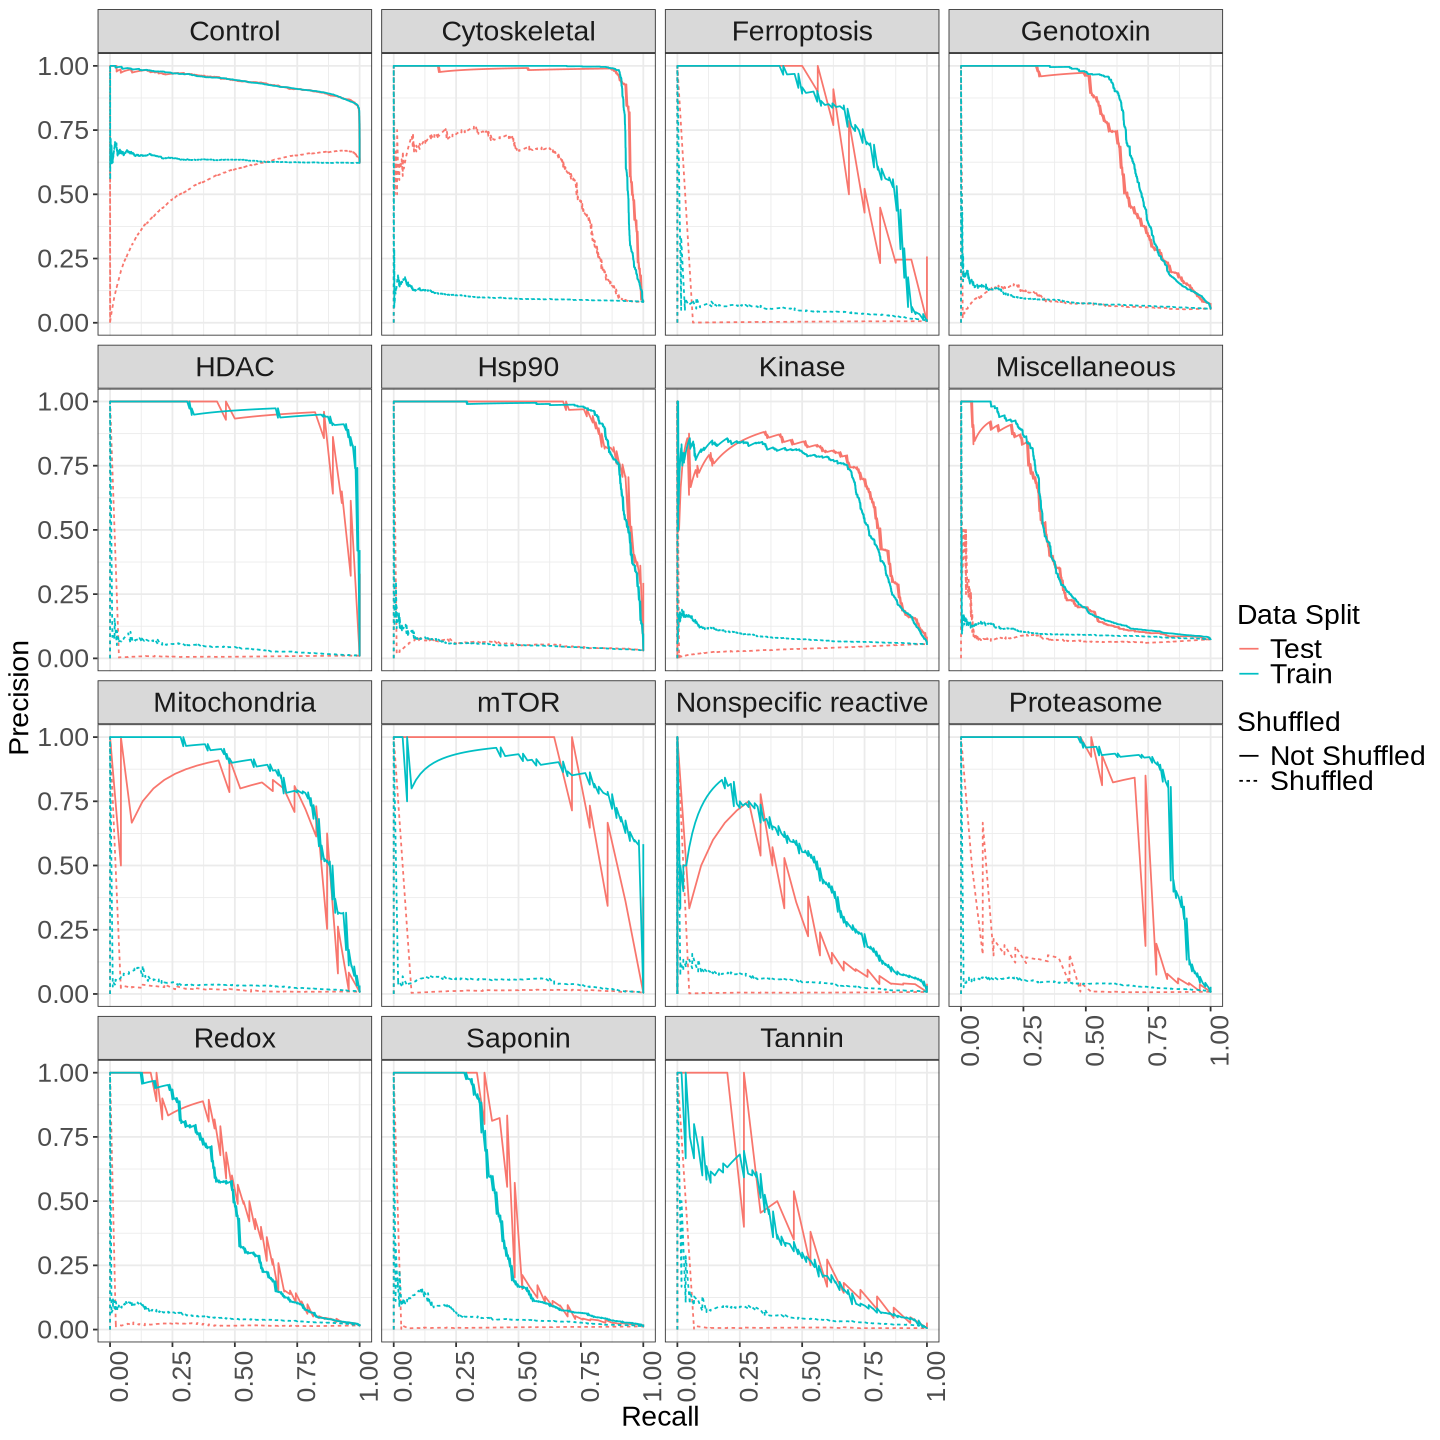

In [9]:
# Filter the dataframe to select only "test", "train", and "plate_holdout" datasets
filtered_pr_df <- pr_df %>%
  filter(dataset_type %in% c("Test", "Train"))

# Create line_id column
filtered_pr_df <- filtered_pr_df %>%
  mutate(line_id = case_when(
    dataset_type == "Test" & shuffled == "Not Shuffled" ~ "Test + Not Shuffled",
    dataset_type == "Test" & shuffled == "Shuffled" ~ "Test + Shuffled",
    dataset_type == "Train" & shuffled == "Not Shuffled" ~ "Train + Not Shuffled",
    dataset_type == "Train" & shuffled == "Shuffled" ~ "Train + Shuffled",
  )) %>%
  mutate(is_train_test = if_else(dataset_type %in% c("test", "train"), "test_train", "plate_holdout"))

# plot data
width <- 12
height <- 12
options(repr.plot.width = width, repr.plot.height = height)

pr_curve_plot_train_test <- ggplot(filtered_pr_df, aes(x = recall, y = precision)) +
    geom_line(aes(color = dataset_type, linetype = shuffled)) +
    facet_wrap(~injury_type) +
    xlab("Recall") +
    ylab("Precision") +
    theme_bw() +
    theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90, size = 16),
        axis.text.y = element_text(size = 16),
        strip.text = element_text(size = 17),
        strip.text.x = element_text(margin = margin(t=0.2, b=0.2, r=0, l=0, "cm")),
        axis.title = element_text(size = 17),
        legend.title = element_text(size = 17),
        legend.text = element_text(size = 17)) +
    labs(color = "Data Split", linetype = "Shuffled")

ggsave("figures/only_test_train_pr_curve.png", width = width, height = height, dpi=600)

pr_curve_plot_train_test

## Supplmental Figure Y: PR Curve of the plate holdouts

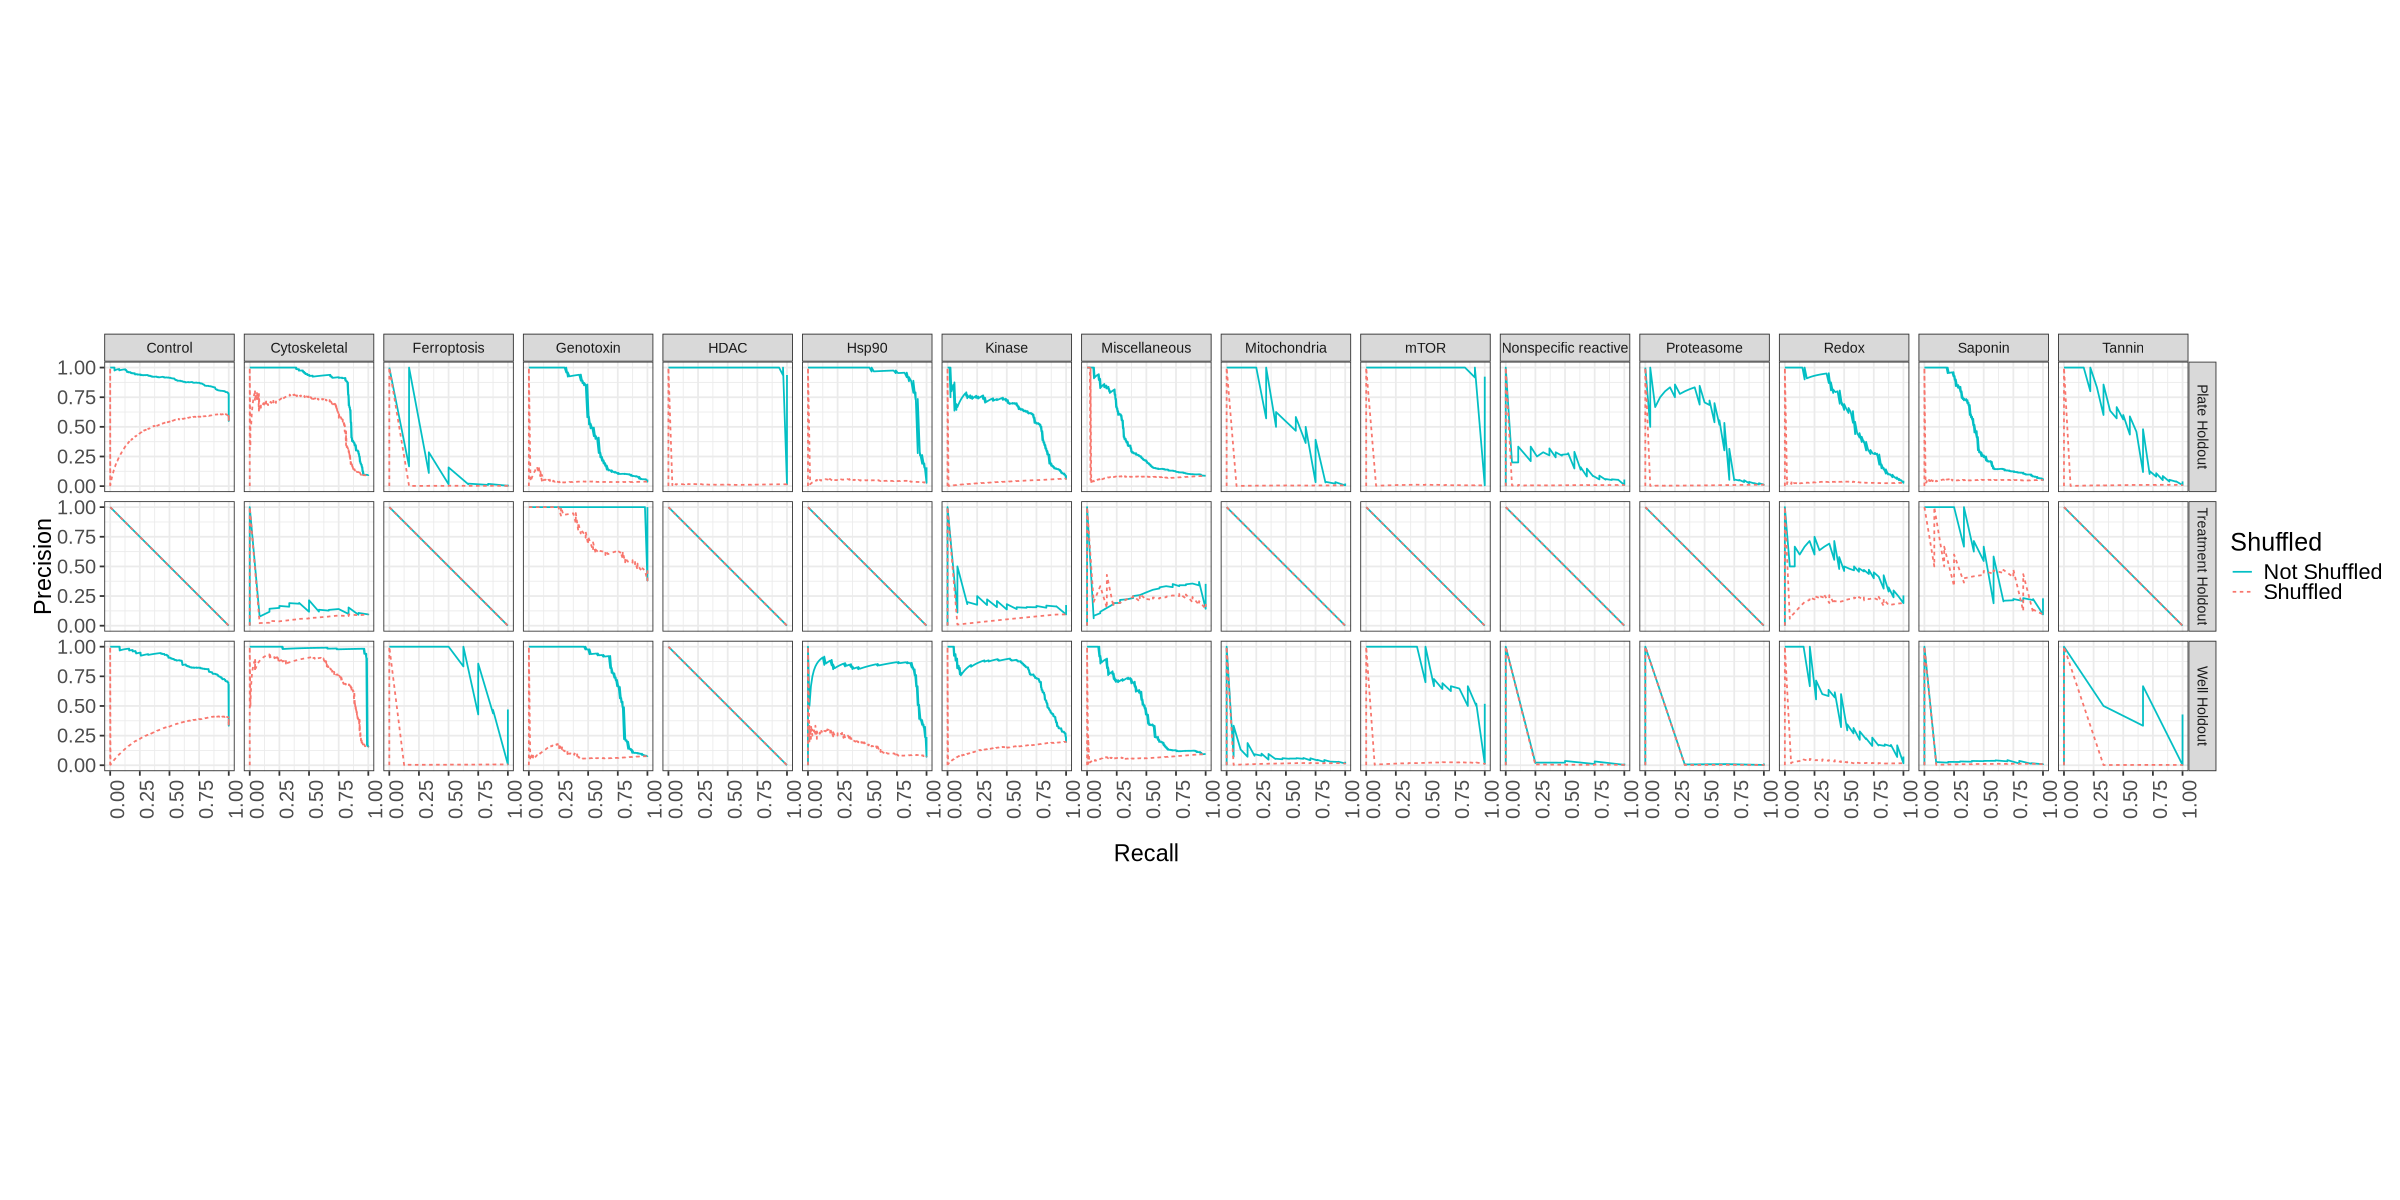

In [10]:
# creating data frame with only the holdout scores
dataset_order <- c("Plate Holdout", "Treatment Holdout", "Well Holdout")
holdout_pr_df <- pr_df %>%
  filter(dataset_type %in% dataset_order)
holdout_pr_df$dataset_type <- factor(holdout_pr_df$dataset_type, levels = dataset_order)


# Set plot dimensions
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

# Create the plot
holdout_pr_curve_plot <- ggplot(holdout_pr_df, aes(x = recall, y = precision, color = shuffled)) +
  geom_line(aes(linetype = shuffled)) +
  facet_grid(dataset_type ~ injury_type) +
  theme_bw() +

  theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.1, "cm"),
    legend.key.size = unit(0.7, "lines"),
    legend.key.width = unit(1, "lines"),
    legend.title = element_text(size = 15),
    legend.text = element_text(size = 13),
    
    # facet params
    strip.text = element_text(size = 8.5),
    # strip.text.x = element_text(margin = margin(2,2,2,2, "cm")),

    # axis params
    axis.text.x = element_text(angle = 90, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    axis.title.x.bottom = element_text(margin = margin(t = 15)),
    axis.title.y.left = element_text(margin = margin(l = 15))
    ) +

 scale_color_manual(values = c(
      "Shuffled" = "#f8766d",
      "Not Shuffled" = "#03bfc4"
    )) +

labs(x = "Recall", y = "Precision", linetype = "Shuffled", color = "Shuffled") +
coord_fixed()

# Save the plot
ggsave("figures/supplemental/sfig_holdout_pr_curves.png", width = width, height = height, dpi = 600)
holdout_pr_curve_plot


## Figure 1 Panel D

Warning message in brewer.pal(2, "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Picking joint bandwidth of 0.00449

Picking joint bandwidth of 0.00469

Picking joint bandwidth of 0.00318

Picking joint bandwidth of 0.00905

Picking joint bandwidth of 0.00502

Picking joint bandwidth of 0.00628

Picking joint bandwidth of 0.00578

Picking joint bandwidth of 0.00872

Picking joint bandwidth of 0.00506

Picking joint bandwidth of 0.00402

Picking joint bandwidth of 0.00547

Picking joint bandwidth of 0.00578

Picking joint bandwidth of 0.00804

Picking joint bandwidth of 0.00634

Picking joint bandwidth of 0.0034

Picking joint bandwidth of 0.00449

Picking joint bandwidth of 0.00469

Picking joint bandwidth of 0.00318

Picking joint bandwidth of 0.00905

Picking joint bandwidth of 0.00502

Picking joint bandwidth of 0.00628

Picking joint bandwidth of 0.00578

Picking joint bandwidth of 0.00872

Picking joint bandwidth of 0.00506

Picking joint

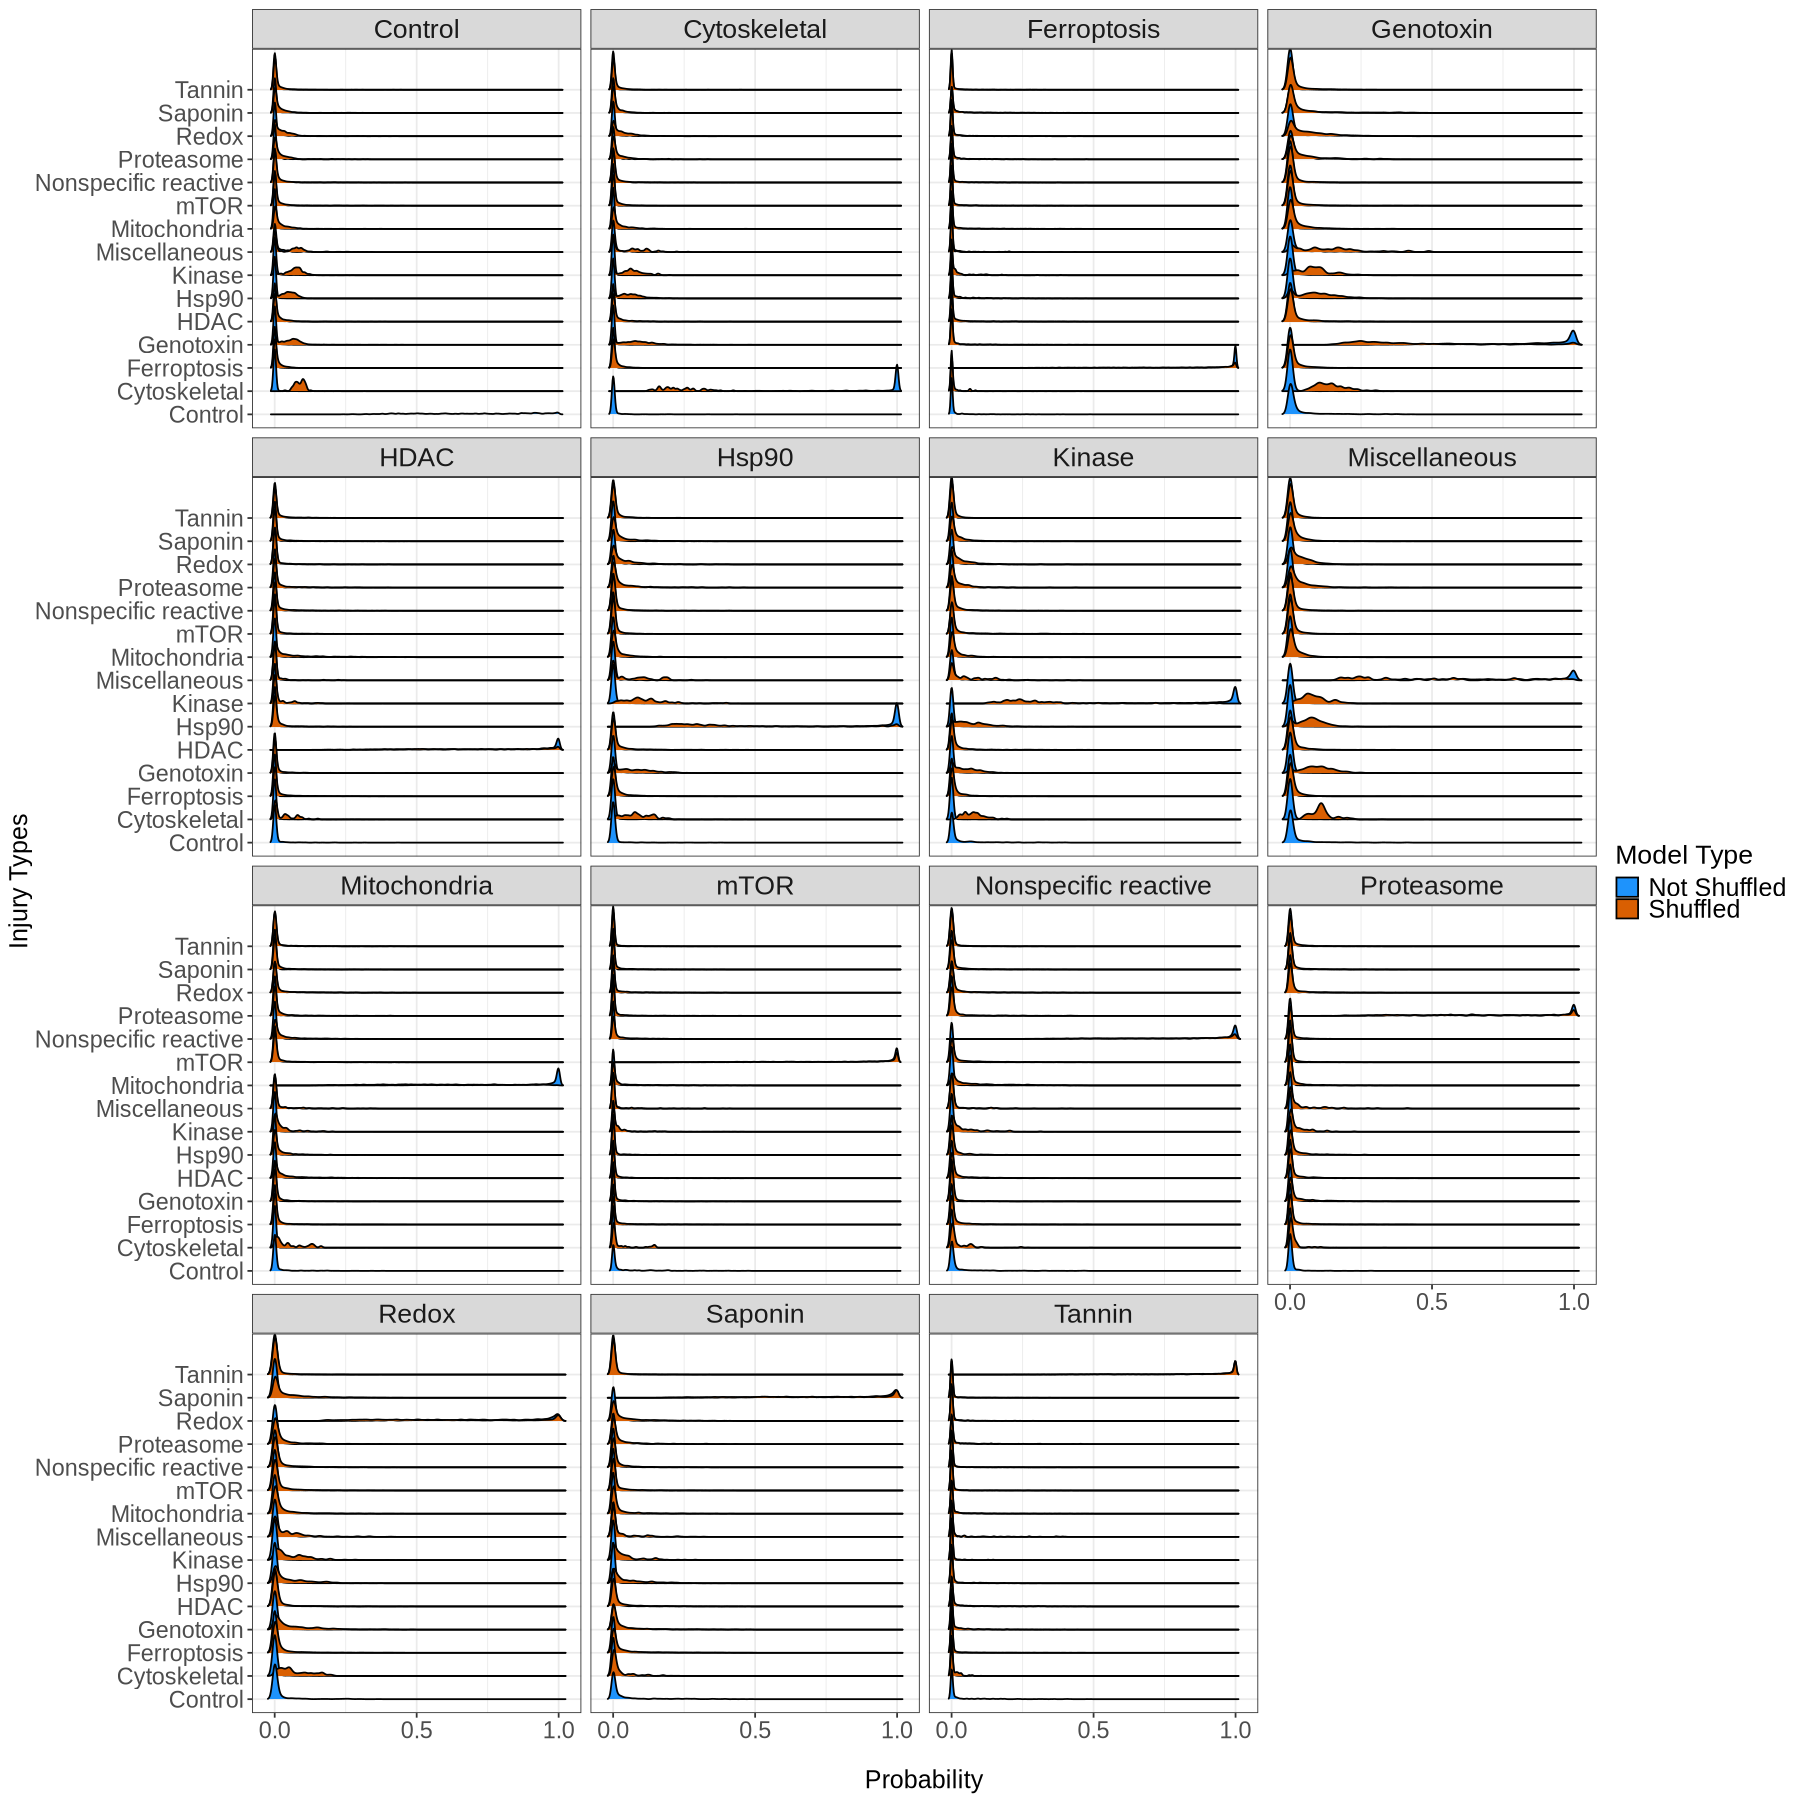

In [11]:
# image size
img_height <- 15
img_width <- 15

options(repr.plot.width = img_width, repr.plot.height = img_height)
probabilities_ridge_plot <- (
    ggplot(proba_df, aes(x = proba, y = pred_injury, fill = shuffled_model)) +
    geom_density_ridges() +
    facet_wrap(~injury_type) +
    scale_x_continuous(breaks = seq(0, 1, 0.5)) +
    theme_bw() +

    # no legend
    theme(plot.title = element_text(size = 20, hjust = 0.5)) +

    scale_fill_manual(values = c(
    "Shuffled" = brewer.pal(2, "Dark2")[2],
    "Not Shuffled" = "#1E93FC"
    )) +

    theme(
        axis.title.x = element_blank(),
        strip.text = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 15),
        axis.title.y.left = element_text(margin = margin(t = 15)),
        axis.title.x.bottom = element_text(margin = margin(t = 15)),
        
        # legend 
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 15),
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        )) +

    labs(y = "Injury Types", x = "Probability", fill = "Model Type")


ggsave(filename = "figures/JUMP_cell_injury_facet_proba.png", height = img_height, width = img_width, dpi=600)
probabilities_ridge_plot

## Finalizing figure with patchwork

In [12]:
# Define plot dimensions
height = 20
width = 25

options(repr.plot.width=width, repr.plot.height=height, units = "cm", dpi = 600)

# Combine plots using patchwork
top_plot <- (
  wrap_elements(full = pr_curve_plot_train_test) |
  f1_bar_plot
) + plot_layout(widths = c(2, 2))

bottom_plot <- (
  confusion_matrix_plot |
  probabilities_ridge_plot
)

# Combine top and bottom plots
fig2 <- (
  top_plot /
  bottom_plot
) + plot_annotation(tag_levels = "A") + plot_layout(heights = c(4, 4))

# Adjust the margins of the bottom right plot (probabilities_ridge_plot)
fig2 <- fig2 + plot_annotation( tag_levels = "A")

# Display the combined plot
fig2

# Save the plot
ggsave(
  plot = fig2,
  filename = "Figure2_model_performance_and_JUMP.png",
  height = height,
  width = width,
  dpi = 600
)


ERROR: Error in eval(expr, envir, enclos): object 'confusion_matrix_plot' not found
